In [1]:
!pip install apyori 
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=30cc8949538fedb9c789ebc87025a455e6cefe206300c138fe8dcd98c344ea73
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
!pip install networkx

In [3]:
!pip install mpld3

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.5-py3-none-any.whl size=200907 sha256=5fe877597f64dc9b2327000990580833b6901b7ad4bf0795bf75291252d8f6b8
  Stored in directory: /root/.cache/pip/wheels/3b/f3/08/a11447ac4ea31d7603142e76b4cba9e48b2fa7d82b76b69731
Successfully built mpld3


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [6]:
import numpy as np
import pandas as pd
import re

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

**데이터 로드 (언론사의 모든 기사)**

In [9]:
# f = open('/content/pre_press_0.xlsx', 'r', encoding='UTF-8')
# lines = f.readlines()
# f.close()

news = pd.read_excel('/content/pre_press_0.xlsx', usecols=[1,2,3,4,6,14])  
# 1:날짜, 2:언론사(경향신문), 3:기자이름, 4:기사제목,  6:카테고리, 14:keyword, 15:topkeyword
print(news.head(3))
len(news)

       date  ...                                            keyword
0  20210430  ...  원태,평균,자책,사자,포효,무실점,LG,상대,5경기,4승,공동,삼성,LG,0.5경기...
1  20210430  ...  한의약,의료,서비스,건보,확대,증진,국민,건강,도움,회장,박성우,서울시한의,사회,월...
2  20210430  ...  불편,여론,골프장,박찬호,효과,독점,코리안,투어,관심,흥행,도움,긍정,분위기,2라운...

[3 rows x 6 columns]


3675

In [10]:
print(type(news))
print(news.loc[1])

<class 'pandas.core.frame.DataFrame'>
date                                                20210430
press                                                   경향신문
name                            박효순 기자 anytoc@kyunghyang.com
title                       “한의약 의료서비스의 건보 확대, 국민 건강 증진에 도움”
c2                                                     사회>여성
keyword    한의약,의료,서비스,건보,확대,증진,국민,건강,도움,회장,박성우,서울시한의,사회,월...
Name: 1, dtype: object


**모든 기사의 keywords를 리스트에 저장**

In [11]:
dataset = []
for i in range(len(news)):
  dataset.append(news.loc[i].to_list())

print(dataset[:2])

  # dataset.append(list(np.array(news.loc[i].tolist())))

print(dataset[:3])
print(dataset[1])
print(dataset[1][0])
len(dataset)

[[20210430, '경향신문', '하경헌 기자 azimae@kyunghyang.com', '원태인, 평균자책 1위 ‘젊은 사자’의 포효', ' 스포츠>농구_배구', '원태,평균,자책,사자,포효,무실점,LG,상대,5경기,4승,공동,삼성,LG,0.5경기,선두,경기,사자,포효,삼성,토종,에이스,원태인,1위,LG전,완벽,투구,4월,MVP,후보,원태인,삼성라이온즈파크,대구,LG,시즌,경기,선발,등판,7이닝,LG,타선,완벽,이날,경기,결과,평균자책,1.16,원태인,수아레즈,LG,앤드류,1.23,1위,평균,자책,리그,이날,승리,다승,뷰캐넌,데이비드,승리투수,이날,SSG,승리,투수,미란다,두산,아리엘,4승,공동선두,형성,원태인,호투,도쿄,올림픽,3개월,선발진,구축,고심,김경문호,희소식,구창모,초반,NC,원태인,투구,투수,원태인,이날,등판,퀄리티스타트,6이닝,피칭,장식,삼자,범퇴,상대,원태인,이형종,2루,이천웅,김민성,삼진,땅볼,처리,3회,삼자범퇴,처리,원태인,위기,오지환,볼넷,김현수,우전안타,2루,위기,무사,라모스,로베르토,이형종,이천웅,땅볼,정리,위기,삼성,3회,3루,호세,피렐라,땅볼,1점,선취,5회,피렐라,투수,이정용,투구,너머,좌측,담장,7회,추가점,이학주,솔로포,삼성,LG,0.5경기,선두,잠실,외국인,투수,아리엘,미란다,무실점,호투,두산,4회,안타,사사구,7득점,SSG,수원,선발,고영표,3실점,연속,퀄리티스타트,피칭,KT,KIA,공동'], [20210430, '경향신문', '박효순 기자 anytoc@kyunghyang.com', '“한의약 의료서비스의 건보 확대, 국민 건강 증진에 도움”', ' 사회>여성', '한의약,의료,서비스,건보,확대,증진,국민,건강,도움,회장,박성우,서울시한의,사회,월경통,시범사업,첩약,건보,시범,사업,추나요,급여,실현,치료비,환자들,급여,항목,부담,회장,서울특별시한의,사회,박성우,한의사,48,원장,사진,23일,회원들,회원,선거,선출,회장,한의약,국민,건강,증진,향상,한의약,의료,서비스,건강,보험,적용,한의약,역할,국민,건강,지킴이,최선,

3675

**입력된 키워드가 담긴 행 데이터만 추출**

In [12]:
keyword = '휴가'
key_data = []

for i in range(len(dataset)):
  if keyword in dataset[i][5]:
    key_data.append(dataset[i])

print(key_data)
print(len(key_data))
print(key_data[0][5])

[[20210430, '경향신문', '정대연 기자 hoan@kyunghyang.com', '공공운수노조, 노동절 하루 앞두고 ‘공공성 강화’ 요구 대규모 집회', ' 사회>여성', '공공운수노조,노동절,하루,공공,강화,집회,요구,민주,노총,공공,운수,노조,정부,상대,코로나19,시대,필수,서비스,공공,강화,노동,보장,요구,집회,공공운수노조,주년,노동절,하루,30일,1시,조합원,참여,주변,정부,세종청사,주변,정부,세종,청사,포위,개최,정부,부처,요구안,전달,계획,이날,집회,방역지침,준수,부처,진행,집회,참여,조합원들,행동,온라인,공동,참여,공공운수노조,요구안,대정부,요구,운영,공공,민주,재정,공공,강화,공영화,필수,서비스,공영,공공성,강화,사회,정의,전환,재난,해고,국가,확대,책임,일자리,코로나19,필수,위험,충원,업무,인력,안전,강화,국민,사회,보험,국가,책임,강화,중단,직무,중심,임금,개악,평등임금,보장,정규,정규직,권리,보장,입법,노조,권리,보장,노조법,전면,개정,안전,운임,확대,강화,제시,요구,기획재정부,과도,예산편성권,분산,재정,공공,민주주,확대,설립,공공,병원,신규,병원,지원,공공병상,확대,기후,위기,대응,기후,정의,실현,사회,전환,기본법,제정,개선,고용,유지,지원금,지원,제도,취약,노동자,확대,긴급,재난,지원금,지급,백신,휴가,확대,필수,노동자,범위,수립,보호,대책,정부,지방자치단체,교섭,유급병,법제화,상병,수당,즉시,노동자,고용,산재보험,적용,보장,공공,노동자,생활,임금,해소,임금,격차,편성,내년도,예산,적정생계비,보장,최저,임금,인상,공공,용역,민간위탁,정규직화,정규,고용,정규,특수고용,플랫폼,인정,노동자,노동자,위원장,현정희,공공,운수,노조,통화,사회,사람,나락,불평등,양극,상황,정부,한국사회,공공성,노동권,강화,방향,생각,집회,개최,예산,편성,막강,권한,기획재정부,재벌,민생,해체,정교섭,추진,조합원,공동행동,조직,세종시,26일,방지,코로나19,확산,집회,시위,행정명령,발동,강화,조치,공공운수노조,이날,집회,신고,미만,미만,제한,연기,자제,요구,

In [13]:
key_list = []
for i in range(len(key_data)):
   key_list.append(key_data[i][5].split(','))
print(key_list)

[['공공운수노조', '노동절', '하루', '공공', '강화', '집회', '요구', '민주', '노총', '공공', '운수', '노조', '정부', '상대', '코로나19', '시대', '필수', '서비스', '공공', '강화', '노동', '보장', '요구', '집회', '공공운수노조', '주년', '노동절', '하루', '30일', '1시', '조합원', '참여', '주변', '정부', '세종청사', '주변', '정부', '세종', '청사', '포위', '개최', '정부', '부처', '요구안', '전달', '계획', '이날', '집회', '방역지침', '준수', '부처', '진행', '집회', '참여', '조합원들', '행동', '온라인', '공동', '참여', '공공운수노조', '요구안', '대정부', '요구', '운영', '공공', '민주', '재정', '공공', '강화', '공영화', '필수', '서비스', '공영', '공공성', '강화', '사회', '정의', '전환', '재난', '해고', '국가', '확대', '책임', '일자리', '코로나19', '필수', '위험', '충원', '업무', '인력', '안전', '강화', '국민', '사회', '보험', '국가', '책임', '강화', '중단', '직무', '중심', '임금', '개악', '평등임금', '보장', '정규', '정규직', '권리', '보장', '입법', '노조', '권리', '보장', '노조법', '전면', '개정', '안전', '운임', '확대', '강화', '제시', '요구', '기획재정부', '과도', '예산편성권', '분산', '재정', '공공', '민주주', '확대', '설립', '공공', '병원', '신규', '병원', '지원', '공공병상', '확대', '기후', '위기', '대응', '기후', '정의', '실현', '사회', '전환', '기본법', '제정', '개선', '고용', '유지', '지원금', '지원', '제도', '취약', '노동자', '확대', '긴급

**연관분석**

In [14]:
results = list(apriori(key_list, 
                       min_support=0.08, 
                       min_confidence=0.2, 
                       min_lift=5, 
                       max_length=2
))
print(results)

[RelationRecord(items=frozenset({'체계', '강화'}), support=0.09302325581395349, ordered_statistics=[OrderedStatistic(items_base=frozenset({'강화'}), items_add=frozenset({'체계'}), confidence=0.5, lift=5.375), OrderedStatistic(items_base=frozenset({'체계'}), items_add=frozenset({'강화'}), confidence=1.0, lift=5.375)]), RelationRecord(items=frozenset({'거리', '부산'}), support=0.09302325581395349, ordered_statistics=[OrderedStatistic(items_base=frozenset({'거리'}), items_add=frozenset({'부산'}), confidence=0.5714285714285714, lift=6.142857142857142), OrderedStatistic(items_base=frozenset({'부산'}), items_add=frozenset({'거리'}), confidence=1.0, lift=6.142857142857142)]), RelationRecord(items=frozenset({'거리', '상향'}), support=0.11627906976744186, ordered_statistics=[OrderedStatistic(items_base=frozenset({'거리'}), items_add=frozenset({'상향'}), confidence=0.7142857142857142, lift=5.119047619047619), OrderedStatistic(items_base=frozenset({'상향'}), items_add=frozenset({'거리'}), confidence=0.8333333333333334, lift=5.11904

In [15]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)


for result in results:
  if len(result.items) == 2:
    items = [x for x in result.items]
    row = [items[0],items[1], result.support]
    series = pd.Series(row, index=network_df.columns)
    network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,체계,강화,0.093023
1,거리,부산,0.093023
2,거리,상향,0.116279
3,의심,거절,0.093023
4,국회,고용,0.093023


**단어 빈도 추출**

In [16]:
from  collections import Counter

for i in range(len(key_list)):
  count = Counter(key_list[i])
  count.update(key_list[i])


# 한글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 2})
print(remove_char_counter)


Counter({'대구시': 10, '백신접종': 8, '접종률': 4, '66.7%': 4, '71.7%': 4, '근로자': 4, '특별휴가': 4, '공무원들': 4, '광역단체': 2, '광역자치단체': 2, '공직자들': 2, '특별휴가제': 2, '공무원': 2, '대상자': 2, '대응요원': 2, '코로나19': 2, '6200명': 2, '사업소': 2, '940명': 2, '7100여명': 2, '업무대행자': 2, '행정안전부': 2, '복무관리지침': 2, '다음날': 2, '이상반응': 2, '관계자': 2, '행안부': 2, '자발적': 2, '안전성': 2, '권영진': 2, '실효성': 2, '분위기': 2, '촉매제': 2})


**키워드 워드클라우드**

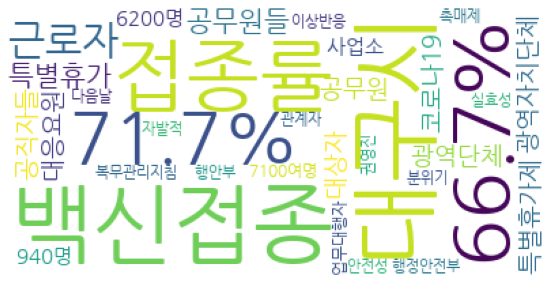

In [17]:
from wordcloud import WordCloud

plt.rc('font', family='Malgun Gothic')    

wordcloud = WordCloud(relative_scaling = 0.2,font_path='font/NanumGothic.ttf', background_color='white'
                    ).generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
#plt.title(keyword + ' WordCloud', fontsize=20, color='red' )
plt.axis("off")
plt.show()

**단어 빈도 점수 추가**

In [18]:
# 키워드-> node, 키워드 빈도 점수-> nodesize

node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
# node_df = node_df[node_df['nidesize'] >= 50]  # 시각화 편의를 위해 50이하 제거
node_df.head()

,node,nodesize
0,대구시,10
1,광역단체,2
2,광역자치단체,2
3,공직자들,2
4,백신접종,8


**네트워크 시각화**

In [19]:
import networkx as nx
import mpld3

G = nx.Graph()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 55092 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53412 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50892 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46300 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44

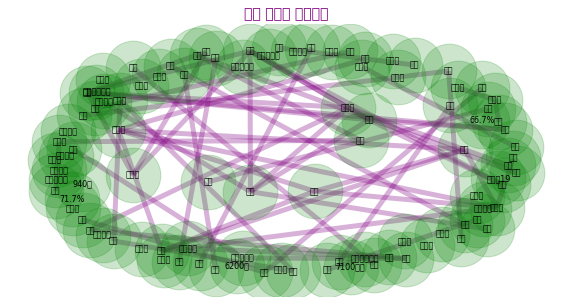

In [20]:
mpld3.enable_notebook()
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(1, 1, 1)

ax.set_title(keyword + ' 키워드 연관분석', fontsize=14, color='purple')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# ax.axis("off")
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# 키워드 빈도 수 데이터를 기반으로, 노드 역할을 하는 원 생성
for index, row in node_df.iterrows():
  G.add_node(row['node'], nodesize=row['nodesize'])


# 연관분석 데이터를 기반으로, 관계 역할을 하는 선 생성
for index,row in network_df.iterrows():
  G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])


# 그래프 디자인
layout = nx.spring_layout(G, k=.6)
nx.draw_networkx_nodes(G,pos=layout,node_size=3000,node_color='green',alpha=.2)
nx.draw_networkx_edges(G,pos=layout,width=5, edge_color='purple',alpha=.3)
nx.draw_networkx_labels(G,pos=layout,font_size=8, font_color='black',font_family= 'DNanumBarunGothic')

plt.axis("off")
plt.show()

# 그래프 저장
# name = keyword + 'networkx'
# mpld3.save_html(fig, name+'.html')

In [21]:
G.nodes

NodeView(('대구시', '광역단체', '광역자치단체', '공직자들', '백신접종', '접종률', '특별휴가제', '66.7%', '71.7%', '공무원', '근로자', '특별휴가', '대상자', '대응요원', '코로나19', '6200명', '사업소', '940명', '7100여명', '업무대행자', '행정안전부', '복무관리지침', '공무원들', '다음날', '이상반응', '관계자', '행안부', '자발적', '안전성', '권영진', '실효성', '분위기', '촉매제', '체계', '강화', '거리', '부산', '상향', '의심', '거절', '국회', '고용', '노동', '노동자', '보호', '서비스', '임금', '제정', '대통령', '공약', '미국', '침해', '과도', '차단', '관심', '긴급', '국방부', '부대', '상륙', '장병', '지휘관', '근로', '근로기준법', '인증', '실제', '지급', '사회적', '단계', '불안', '면역', '집단', '방식', '활동', '통과', '법안', '재판', '법원', '변화', '영향', '현지시간', '보도', '적용', '조건', '사람들', '확진자', '상대', '신고', '업체', '시각', '지속', '혐의', '회의', '청와대', '차원', '참모', '총장'))

In [22]:
G.edges

EdgeView([('체계', '강화'), ('거리', '부산'), ('거리', '상향'), ('의심', '거절'), ('국회', '고용'), ('국회', '보호'), ('고용', '노동'), ('고용', '노동자'), ('고용', '보호'), ('고용', '서비스'), ('고용', '임금'), ('고용', '제정'), ('노동', '보호'), ('노동', '서비스'), ('노동', '제정'), ('노동', '지급'), ('노동자', '임금'), ('노동자', '제정'), ('보호', '서비스'), ('보호', '적용'), ('보호', '제정'), ('서비스', '업체'), ('서비스', '인증'), ('서비스', '제정'), ('제정', '적용'), ('대통령', '공약'), ('대통령', '미국'), ('공약', '미국'), ('침해', '과도'), ('차단', '관심'), ('긴급', '국방부'), ('긴급', '부대'), ('긴급', '장병'), ('긴급', '지휘관'), ('국방부', '부대'), ('국방부', '상륙'), ('국방부', '장병'), ('국방부', '지휘관'), ('부대', '장병'), ('부대', '지휘관'), ('장병', '지휘관'), ('지휘관', '회의'), ('근로', '근로기준법'), ('근로', '인증'), ('근로기준법', '실제'), ('사회적', '단계'), ('사회적', '확진자'), ('불안', '면역'), ('면역', '집단'), ('집단', '청와대'), ('방식', '활동'), ('통과', '법안'), ('재판', '법원'), ('재판', '혐의'), ('변화', '영향'), ('현지시간', '보도'), ('조건', '사람들'), ('상대', '신고'), ('시각', '지속'), ('청와대', '차원'), ('참모', '총장')])

In [23]:
G.degree

DegreeView({'대구시': 0, '광역단체': 0, '광역자치단체': 0, '공직자들': 0, '백신접종': 0, '접종률': 0, '특별휴가제': 0, '66.7%': 0, '71.7%': 0, '공무원': 0, '근로자': 0, '특별휴가': 0, '대상자': 0, '대응요원': 0, '코로나19': 0, '6200명': 0, '사업소': 0, '940명': 0, '7100여명': 0, '업무대행자': 0, '행정안전부': 0, '복무관리지침': 0, '공무원들': 0, '다음날': 0, '이상반응': 0, '관계자': 0, '행안부': 0, '자발적': 0, '안전성': 0, '권영진': 0, '실효성': 0, '분위기': 0, '촉매제': 0, '체계': 1, '강화': 1, '거리': 2, '부산': 1, '상향': 1, '의심': 1, '거절': 1, '국회': 2, '고용': 7, '노동': 5, '노동자': 3, '보호': 6, '서비스': 6, '임금': 2, '제정': 6, '대통령': 2, '공약': 2, '미국': 2, '침해': 1, '과도': 1, '차단': 1, '관심': 1, '긴급': 4, '국방부': 5, '부대': 4, '상륙': 1, '장병': 4, '지휘관': 5, '근로': 2, '근로기준법': 2, '인증': 2, '실제': 1, '지급': 1, '사회적': 2, '단계': 1, '불안': 1, '면역': 2, '집단': 2, '방식': 1, '활동': 1, '통과': 1, '법안': 1, '재판': 2, '법원': 1, '변화': 1, '영향': 1, '현지시간': 1, '보도': 1, '적용': 2, '조건': 1, '사람들': 1, '확진자': 1, '상대': 1, '신고': 1, '업체': 1, '시각': 1, '지속': 1, '혐의': 1, '회의': 1, '청와대': 2, '차원': 1, '참모': 1, '총장': 1})

In [24]:
print(nx.info(G))

Graph with 96 nodes and 61 edges


In [25]:
# pos = nx.spring_layout(G, k=0.6, iterations=50)
# sizes = [G.node[node]['nodesize']*25 for node in G]
# d = dict(G.degree)
# nx.draw(G, pos=pos, node_size = [v * 100 for v in d.values()], with_labels=True)
# nx.draw_networkx_labels(G, pos=pos, font_family= 'Malgun Gothic' ,font_size=25)

In [26]:
# from mlxtend.preprocessing import TransactionEncoder
# tse = TransactionEncoder()
# tse_arr = tse.fit(key_data).transform(key_data)
# tse_df = pd.DataFrame(tse_arr, columns= tse.columns_)
# print(tse_df.head(3))

In [27]:
# from mlxtend.frequent_patterns import apriori

# frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True )
# frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
# frequent_itemsets[(frequent_itemsets['length'] == 2) &
#          (frequent_itemsets['support'] >= 0.01)].sort_values(by='support', ascending=False).head(3)

# from apyori import apriori

# result = list(apriori(key_data, min_support=0.01))
# df = pd.DataFrame(result)
# df['length'] = df['items'].apply(lambda x: len(x))
# df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

# df.head(2)


In [28]:
# pgr = nx.pagerank(graph)
# nsize = np.array([v for v in pgr.values()])
# nsize = 2000 * (nsize -  min(nsize)) / (max(nsize) - min(nsize))

In [29]:
# plt.figure(figsize=(16,12))
# plt.axis('off')
# nx.draw_networkx(graph, font_family='KoPubDotum', font_size=18, pos=pos, 
#                  node_color=list(pagerank.values()), node_size=nsize, alpha=0.7,
#                  edge_color='.7', cmap=plt.cm.YIGn)
# plt.savefig('저장경로', bbox_inches='tight')